# Decision Tree

### Titanic

In [4]:
import pandas as pd


df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df=df.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"])
df["Age"].fillna(df["Age"].median(),inplace=True)
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

df=pd.get_dummies(df,columns=["Sex","Embarked"],drop_first=True)

X=df.drop("Survived",axis=1)
y=df["Survived"]

C:\Users\USER\AppData\Local\Temp\ipykernel_16612\3761253000.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(),inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_16612\3761253000.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=5,random_state=42)

dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
y_pred=dt.predict(X_test)

from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[95 10]
 [26 48]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       105
           1       0.83      0.65      0.73        74

    accuracy                           0.80       179
   macro avg       0.81      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179

Accuracy: 0.7988826815642458


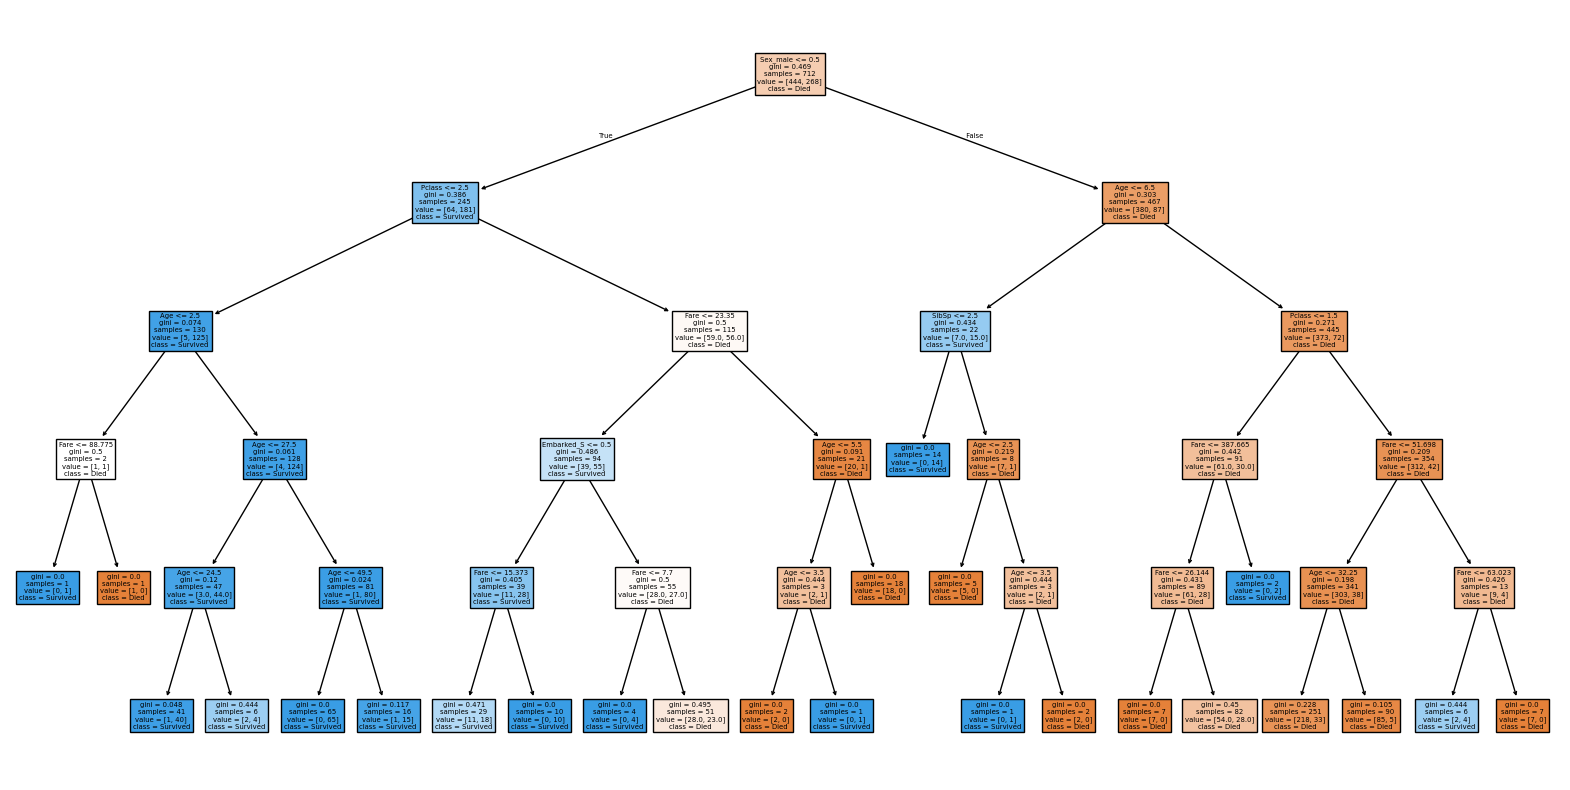

In [9]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))

plot_tree(dt,filled=True,feature_names=X.columns,class_names=["Died","Survived"])
plt.show()

### Weather Dataset

In [35]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns

we_df=pd.read_csv("dataset/Weather_Dataset.csv")
 
we_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [36]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
we_df["Weather_encoded"]=le.fit_transform(we_df["Weather"])

In [37]:
we_df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather,Weather_encoded
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog,7
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog,7
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog",9
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog",9
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog,7


In [38]:
numeric_cols=we_df.select_dtypes(include='number')

In [39]:
X=numeric_cols.drop("Weather_encoded",axis=1)
y=we_df["Weather_encoded"]

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

model=DecisionTreeClassifier(max_depth=6,random_state=42)

model.fit(X_train,y_train)
y_pred=model.predict(X_test)




print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred,target_names=le.classes_,labels=le.transform(le.classes_)))
print("Accuracy:", accuracy_score(y_test, y_pred))

[[ 91  48   0 ...   0   0   0]
 [ 28 178   0 ...   0   0   0]
 [  0   5   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   2   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
                                         precision    recall  f1-score   support

                                  Clear       0.45      0.36      0.40       251
                                 Cloudy       0.37      0.50      0.42       356
                                Drizzle       0.00      0.00      0.00         9
                            Drizzle,Fog       0.40      0.11      0.17        18
                Drizzle,Ice Pellets,Fog       0.00      0.00      0.00         0
                           Drizzle,Snow       0.00      0.00      0.00         1
                       Drizzle,Snow,Fog       0.00      0.00      0.00         1
                                    Fog       0.61      0.57      0.59        35
                       Freezing Drizzle       0.00      0.00      0.00        

c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\ProgramData\anaconda3\envs\exassaro\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))

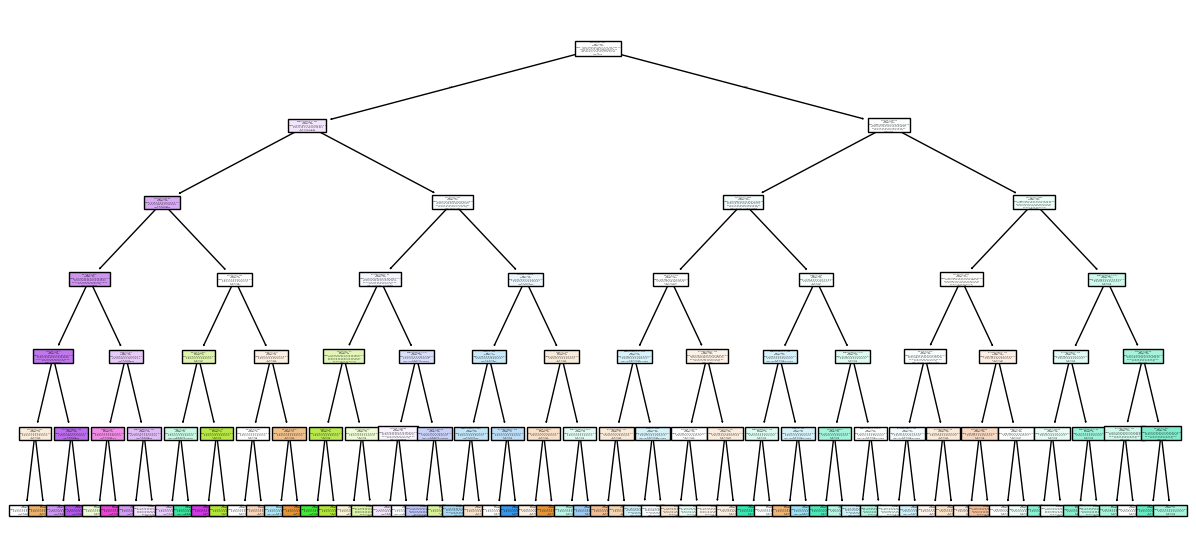

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


plt.figure(figsize=(15,7))

plot_tree(model,filled=True,feature_names=X.columns,class_names=le.classes_)
plt.show()